In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [88]:
dataset = pd.DataFrame()
df = pd.read_csv(r"C:\Mubarak\PROJECTS\PROJECTS\HousePricePrediction\HousingData.csv")

In [89]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [90]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [91]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [92]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [93]:
df_dropped = df.dropna(inplace=True)
print(df_dropped)

None


In [94]:
## EDA
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.188075,0.391552,-0.051970,0.416160,-0.227170,0.341311,-0.365052,0.608667,0.560841,0.265428,-0.386254,0.461906,-0.397230
ZN,-0.188075,1.000000,-0.521256,-0.033357,-0.515660,0.343210,-0.568174,0.645359,-0.298773,-0.305768,-0.422164,0.169894,-0.415041,0.406822
INDUS,0.391552,-0.521256,1.000000,0.049820,0.762737,-0.403068,0.642387,-0.696569,0.591944,0.734204,0.395691,-0.344788,0.598156,-0.510829
CHAS,-0.051970,-0.033357,0.049820,1.000000,0.076661,0.095308,0.072644,-0.095037,0.014102,-0.026513,-0.104995,0.068913,-0.037113,0.173701
NOX,0.416160,-0.515660,0.762737,0.076661,1.000000,-0.316563,0.732540,-0.768137,0.628170,0.679824,0.210216,-0.384257,0.593655,-0.459054
RM,-0.227170,0.343210,-0.403068,0.095308,-0.316563,1.000000,-0.248670,0.218713,-0.236057,-0.320561,-0.390686,0.123320,-0.636226,0.723951
AGE,0.341311,-0.568174,0.642387,0.072644,0.732540,-0.248670,1.000000,-0.753547,0.443585,0.504472,0.264968,-0.281990,0.601137,-0.407470
DIS,-0.365052,0.645359,-0.696569,-0.095037,-0.768137,0.218713,-0.753547,1.000000,-0.477075,-0.529603,-0.228840,0.285168,-0.505036,0.279547
RAD,0.608667,-0.298773,0.591944,0.014102,0.628170,-0.236057,0.443585,-0.477075,1.000000,0.900000,0.441949,-0.444135,0.510868,-0.416638
TAX,0.560841,-0.305768,0.734204,-0.026513,0.679824,-0.320561,0.504472,-0.529603,0.900000,1.000000,0.446961,-0.435457,0.572218,-0.508864


In [95]:
import seaborn as sns
#sns.pairplot(df)

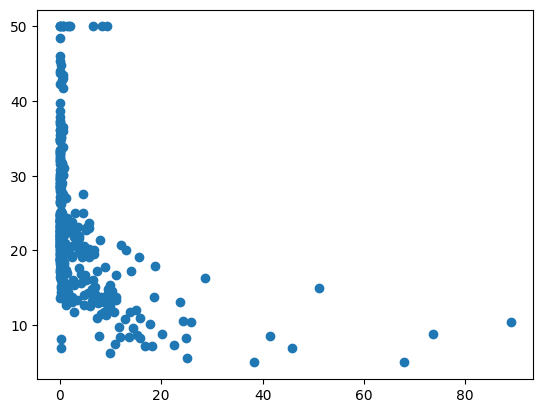

In [96]:
plt.scatter(df['CRIM'], df['MEDV'])

 

In [97]:
import seaborn as sns


<Axes: xlabel='LSTAT', ylabel='MEDV'>

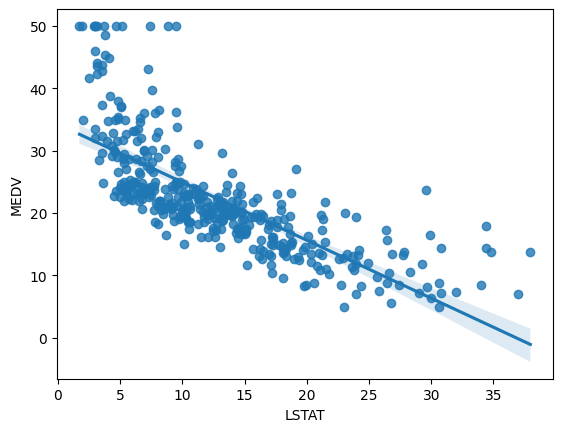

In [98]:
sns.regplot(x='LSTAT', y='MEDV', data=df)

<Axes: xlabel='PTRATIO', ylabel='MEDV'>

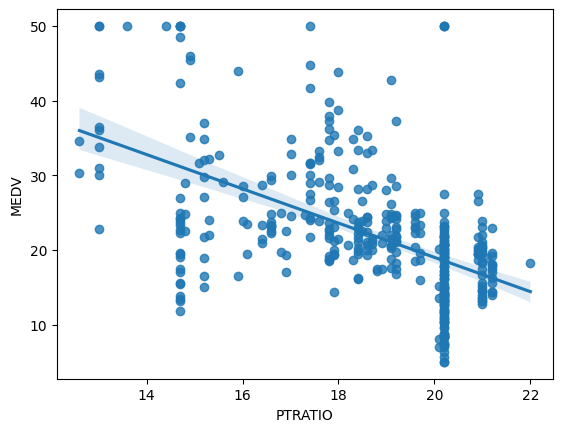

In [99]:
sns.regplot(x='PTRATIO', y='MEDV', data=df)

In [100]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [101]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [102]:
X_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
93,0.02875,28.0,15.04,0.0,0.464,6.211,28.9,3.6659,4,270,18.2,396.33,6.21
352,0.07244,60.0,1.69,0.0,0.411,5.884,18.5,10.7103,4,411,18.3,392.33,7.79
319,0.47547,0.0,9.90,0.0,0.544,6.113,58.8,4.0019,4,304,18.4,396.23,12.73
65,0.03584,80.0,3.37,0.0,0.398,6.290,17.8,6.6115,4,337,16.1,396.90,4.67
499,0.17783,0.0,9.69,0.0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
358,5.20177,0.0,18.10,1.0,0.770,6.127,83.4,2.7227,24,666,20.2,395.43,11.48
457,8.20058,0.0,18.10,0.0,0.713,5.936,80.3,2.7792,24,666,20.2,3.50,16.94
321,0.18159,0.0,7.38,0.0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87
190,0.09068,45.0,3.44,0.0,0.437,6.951,21.5,6.4798,5,398,15.2,377.68,5.10


In [103]:
y_test

93     25.0
352    18.6
319    21.0
65     23.5
499    17.5
       ... 
358    22.7
457    13.5
321    23.1
190    37.0
131    19.6
Name: MEDV, Length: 119, dtype: float64

In [104]:
## Standardize the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [105]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

## Model Training

In [106]:
from sklearn.linear_model import LinearRegression


In [107]:
regression = LinearRegression()

In [108]:
regression.fit(X_train, y_train)

LinearRegression()

In [109]:
## print the coefficient and the intercept
print(regression.coef_)

[-1.16422484  1.06108499  0.39032387  0.29209079 -1.99660097  2.919107
 -0.56678274 -2.98589329  2.41887408 -2.87948075 -1.92242361  0.87551786
 -2.71551439]


In [110]:
print(regression.intercept_)

21.872363636363634


In [111]:
##ON which parametere the model has been trained
regression.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [112]:
##Prediction with test data
reg_pred = regression.predict(X_test)

In [113]:
reg_pred


array([29.4740629 , 16.37996746, 21.52711342, 29.780343  , 18.04900191,
       33.67985764, 21.99074838, 29.58417588, 32.31794971, 14.32018521,
       21.50907473, 40.01643159, 20.75617092, 16.1887228 , 17.79780198,
       19.4250608 , 15.4010506 , 14.72719577, 20.83030121, 11.38425023,
       18.19855522, 19.9193029 , 14.91561816, 28.71482167, 25.78269283,
       15.58394764, 26.7838576 , 31.33708909, 23.49776506, 26.73893931,
       40.23784446, 16.25798323, 20.36653449, 15.6681383 , 17.12775581,
       20.56961082, 21.09106267, 21.3086931 , 22.96967904, 20.50393574,
       27.62529586, 34.46939649, 20.85284376, 30.33069412, 33.84765941,
       19.37388337, 24.21183015,  6.46586601, 19.21831662, 24.9377608 ,
       21.71314046, 25.29085304, 13.57955522, 17.18936666, 17.80511291,
       23.27771031, 42.81646602, 22.09434468, 15.24563791, 23.25250512,
       20.73845027, 21.08542694, 11.2321196 , 28.62027926, -9.71404469,
       32.04716837, 14.77587283, 30.65998001, 24.7417101 , 19.42

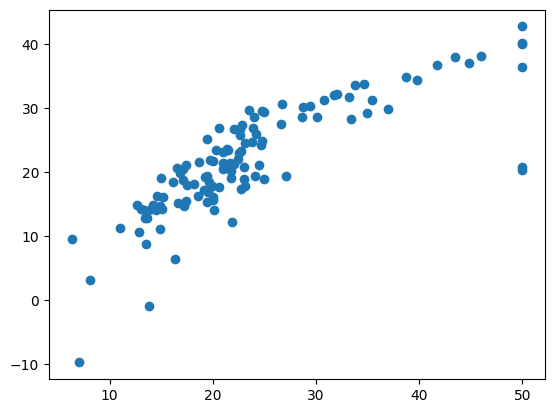

In [114]:
plt.scatter(y_test, reg_pred)

In [115]:
## Prediction with residuals
residuls = y_test - reg_pred

In [116]:
residuls

93    -4.474063
352    2.220033
319   -0.527113
65    -6.280343
499   -0.549002
         ...   
358    5.228092
457    4.648591
321   -1.525013
190    7.133616
131    1.128263
Name: MEDV, Length: 119, dtype: float64

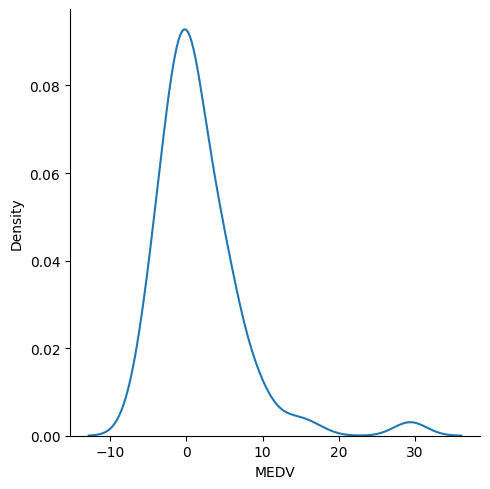

In [117]:
## plo the residuals
sns.displot(residuls, kind="kde")

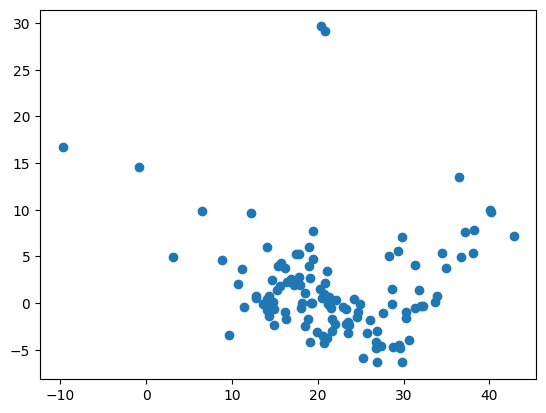

In [118]:
## Scatter plot with respect to perdiction and residuals
## uniform distribution
plt.scatter(reg_pred, residuls)

In [119]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test,reg_pred))
print(mean_absolute_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

33.91693453444477
3.6492025784669173
5.82382473417983


In [120]:
from sklearn.metrics import r2_score
score = r2_score(y_test, reg_pred)
print(score)

0.6364248546526884


In [121]:
score

0.6364248546526884

In [122]:
## the below function is adjusted r2 
## adjusted r2 value should be less than r2
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.5914107890382594

## New Data Prediction

In [123]:
# #this is one dimension

# # to get to two dimension
# datas =  df.iloc[0], (1, 2)
# datas.s

In [124]:
import pickle

In [125]:
pickle.dump(regression, open('regmodel.pkl','wb'))

In [126]:
pickle_model = pickle.load(open('regmodel.pkl','rb'))

In [127]:
pickle_model.predict(X_test)

array([29.4740629 , 16.37996746, 21.52711342, 29.780343  , 18.04900191,
       33.67985764, 21.99074838, 29.58417588, 32.31794971, 14.32018521,
       21.50907473, 40.01643159, 20.75617092, 16.1887228 , 17.79780198,
       19.4250608 , 15.4010506 , 14.72719577, 20.83030121, 11.38425023,
       18.19855522, 19.9193029 , 14.91561816, 28.71482167, 25.78269283,
       15.58394764, 26.7838576 , 31.33708909, 23.49776506, 26.73893931,
       40.23784446, 16.25798323, 20.36653449, 15.6681383 , 17.12775581,
       20.56961082, 21.09106267, 21.3086931 , 22.96967904, 20.50393574,
       27.62529586, 34.46939649, 20.85284376, 30.33069412, 33.84765941,
       19.37388337, 24.21183015,  6.46586601, 19.21831662, 24.9377608 ,
       21.71314046, 25.29085304, 13.57955522, 17.18936666, 17.80511291,
       23.27771031, 42.81646602, 22.09434468, 15.24563791, 23.25250512,
       20.73845027, 21.08542694, 11.2321196 , 28.62027926, -9.71404469,
       32.04716837, 14.77587283, 30.65998001, 24.7417101 , 19.42

In [132]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(X_train)
import pickle
pickle.dump(scaler,open('scaling.pkl','wb'))

In [129]:
sclar_pick = pickle.load(open('scaling.pkl','rb'))

In [130]:
X = sclar_pick.transform(X_test)

In [131]:
X

array([[-0.42814192,  0.67765488,  0.56050236, ..., -0.11465158,
         0.39188699, -0.8817145 ],
       [-0.42043653,  1.97569802, -1.30355609, ..., -0.06932421,
         0.33306903, -0.65344606],
       [-0.34935613, -0.45813288, -0.15719505, ..., -0.02399684,
         0.39041654,  0.06025403],
       ...,
       [-0.40118629, -0.45813288, -0.50906226, ...,  0.5199316 ,
         0.40026855, -0.78636186],
       [-0.41721963,  1.3672403 , -1.05920385, ..., -1.4744727 ,
         0.11764827, -1.04208031],
       [-0.22281951, -0.45813288,  1.51696681, ...,  1.24516954,
         0.40026855, -0.00764861]])